In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import autoviz
import seaborn as sns

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d omkarmanohardalvi/lungs-disease-dataset-4-types

! unzip /content/lungs-disease-dataset-4-types.zip

In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


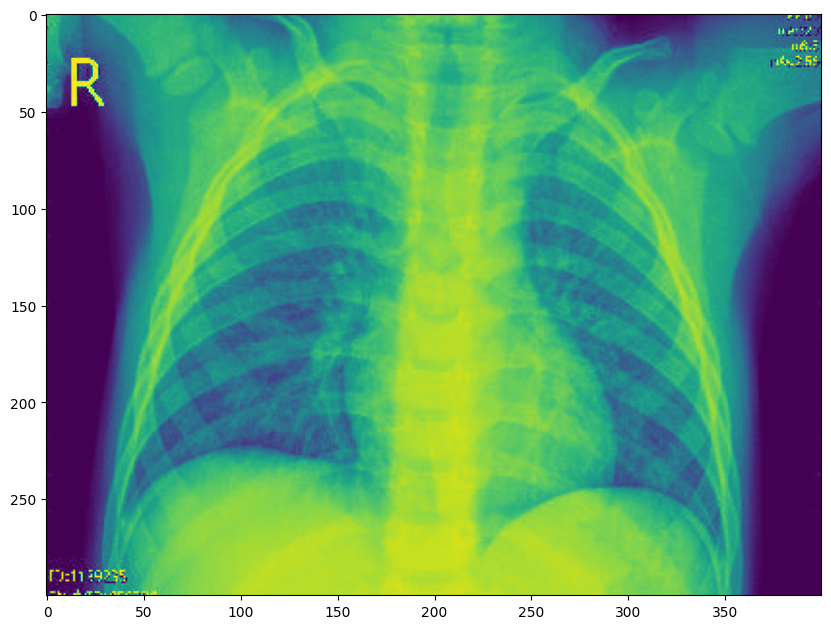

In [ ]:
plt.figure(figsize= (10, 10))
img = mpimg.imread("/content/Lung Disease Dataset/train/Bacterial Pneumonia/122.jpeg")
plt.imshow(img)
plt.show()

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,
traingen = ImageDataGenerator(rescale= 1./255,
                             width_shift_range=0.2 ,
                             height_shift_range=0.2 ,
                             zoom_range=0.2)
valgen = ImageDataGenerator(rescale= 1./255)
testgen = ImageDataGenerator(rescale= 1./255)

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


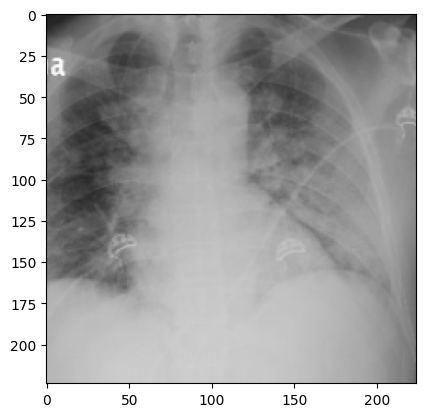

In [ ]:
train_it = traingen.flow_from_directory("/content/Lung Disease Dataset/train", target_size = (224, 224))
val_it = traingen.flow_from_directory("/content/Lung Disease Dataset/val", target_size = (224, 224))
test_it = traingen.flow_from_directory("/content/Lung Disease Dataset/test", target_size = (224, 224))

plt.figure()
plt.imshow(next(train_it)[0][0])
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))  # 5 classes: 4 disease types + normal

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_it,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    epochs=5,
    validation_data=val_it,
    validation_steps=val_it.samples // val_it.batch_size
)

Epoch 1/5
189/189 [==============================] - 162s 817ms/step - loss: 1.2265 - accuracy: 0.4708 - val_loss: 0.9717 - val_accuracy: 0.6027
Epoch 2/5
189/189 [==============================] - 147s 780ms/step - loss: 0.8216 - accuracy: 0.6597 - val_loss: 0.7559 - val_accuracy: 0.6984
Epoch 3/5
189/189 [==============================] - 148s 786ms/step - loss: 0.6829 - accuracy: 0.7157 - val_loss: 0.7213 - val_accuracy: 0.7029
Epoch 4/5
189/189 [==============================] - 147s 780ms/step - loss: 0.6382 - accuracy: 0.7406 - val_loss: 0.6414 - val_accuracy: 0.7440
Epoch 5/5
189/189 [==============================] - 149s 787ms/step - loss: 0.5952 - accuracy: 0.7557 - val_loss: 0.6644 - val_accuracy: 0.7366


In [ ]:
test_loss, test_accuracy = model.evaluate(test_it, steps=test_it.samples // test_it.batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

63/63 [==============================] - 37s 590ms/step - loss: 0.6582 - accuracy: 0.7401
Test Accuracy: 74.01%


In [ ]:
input_image_path = "/content/Lung Disease Dataset/test/Corona Virus Disease/00030357_000.png"

img = tf.keras.preprocessing.image.load_img(input_image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
img_array /= 255.0  # Rescale pixel values to [0, 1]

# Classify the input image using the loaded model
predictions = model.predict(img_array)
class_labels = train_it.class_indices
predicted_class = list(class_labels.keys())[np.argmax(predictions)]

print(f"The predicted class for the input image is: {predicted_class}")

1/1 [==============================] - 0s 415ms/step
The predicted class for the input image is: Corona Virus Disease
